In [1]:
import pandas as pd
df = pd.read_csv('action_annotation.csv')
df

,Unnamed: 0,Scoring,Start,Start_Frame,Stop,Stop_Frame,Subject,Behaviour,Unnamed: 8,Novel Object Position
0,0,1815_C2_703_4wk,1.433333,43,NaN,NaN,1,Begin Trial,1,R
1,1,1815_C2_703_4wk,16.266667,488,17.266667,518.0,1,Left Object,0,NaN
2,2,1815_C2_703_4wk,21.666667,650,21.900000,657.0,1,Left Object,0,NaN
3,3,1815_C2_703_4wk,25.866667,776,32.900000,987.0,1,Left Object,0,NaN
4,4,1815_C2_703_4wk,43.433333,1303,43.800000,1314.0,1,Right Object,0,NaN
...,...,...,...,...,...,...,...,...,...,...
518,518,1815_C2_543_4wk,300.566667,9017,305.400000,9162.0,1,Left Object,0,NaN
519,519,1815_C2_543_4wk,315.766667,9473,316.066667,9482.0,1,Right Object,0,NaN
520,520,1815_C2_543_4wk,324.366667,9731,325.900000,9777.0,1,Right Object,0,NaN
521,521,1815_C2_543_4wk,338.733333,10162,340.333333,10210.0,1,Right Object,0,NaN


In [2]:
filenames = df["Scoring"].unique()
filenames

array(['1815_C2_703_4wk', '1815_C1_616_4wk', '1815_C3_693_4wk',
       '1815_C1_694_4wk', '1816_C3_692_4wk', '1816_C1_542_4wk',
       '1816_C3_695_4wk', '1816_C3_696_4wk', '1816_C2_611_4wk',
       '1816_C1_547_4wk', '1815_C1_548_4wk', '1815_C2_624_4wk',
       '1815_C3_611_4wk', '1815_C4_862_4wk', '1815_C4_623_4wk',
       '1815_C4_529_4wk', '1815_C3_704_4wk', '1815_C3_544_4wk',
       '1815_C2_627_4wk', '1815_C2_543_4wk'], dtype=object)

In [3]:
import sys
sys.path.append('..')
sys.path.append('../models/TSM')
from annotate import _generate_metrics

_map = {
    'R' : 'right',
    'L' : 'left'
}
new_df = {
    'filename': [],
    'n':[],
    'cd':[],
    'me':[],
    'lf':[],
    'll':[],
    'RI':[]
}

for f in filenames:
    print(f)
    actions_df = df[df["Scoring"] == f]
    start_frame, novel_location = int(actions_df.iloc[0]['Start_Frame']), _map[actions_df.iloc[0]['Novel Object Position']]
    
    actions_df = actions_df.iloc[1:]
    investigation_times = {
        "left"  : [],
        "right" : []
    }
    for index, row in actions_df.iterrows():
        action = row['Behaviour']
        if action == 'End Trial':
            break
            
        _start, _end = int(row['Start_Frame']), int(row['Stop_Frame'])
        action = action.split(' ')[0].lower()
        investigation_times[action].append([_start, (_end-_start)])
    metrics = _generate_metrics(investigation_times, novel_location, start_frame, 
                                fps=120 if ('548' in f or '694' in f or '616' in f) else 30)
    new_df['filename'].append(f)
    for k, val in metrics.items():
        new_df[k].append(val)

gt_df = pd.DataFrame(new_df).set_index('filename')
gt_df

1815_C2_703_4wk
1815_C1_616_4wk
1815_C3_693_4wk
1815_C1_694_4wk
1816_C3_692_4wk
1816_C1_542_4wk
1816_C3_695_4wk
1816_C3_696_4wk
1816_C2_611_4wk
1816_C1_547_4wk
1815_C1_548_4wk
1815_C2_624_4wk
1815_C3_611_4wk
1815_C4_862_4wk
1815_C4_623_4wk
1815_C4_529_4wk
1815_C3_704_4wk
1815_C3_544_4wk
1815_C2_627_4wk
1815_C2_543_4wk


,n,cd,me,lf,ll,RI
filename,,,,,,
1815_C2_703_4wk,21,142.300000,6.776190,14.833333,298.733333,0.487702
1815_C1_616_4wk,27,127.350000,4.716667,1.041667,328.266667,0.198076
1815_C3_693_4wk,23,137.800000,5.991304,1.033333,346.633333,0.867683
1815_C1_694_4wk,16,21.441667,1.340104,2.316667,259.250000,0.483871
1816_C3_692_4wk,24,107.633333,4.484722,14.100000,338.400000,0.213069
1816_C1_542_4wk,27,122.933333,4.553086,6.966667,324.900000,0.642354
1816_C3_695_4wk,22,126.366667,5.743939,4.000000,315.000000,0.219467
1816_C3_696_4wk,18,111.033333,6.168519,1.333333,308.166667,0.463224
1816_C2_611_4wk,18,37.800000,2.100000,9.800000,294.066667,0.126102


In [10]:
ai_df = pd.read_csv('ai_metrics.csv').set_index('filename')
ai_df

,n,cd,me,lf,ll,RI
filename,,,,,,
1815_C1_694_4wk,16,22.25,1.390625,1.791667,259.041667,0.494382
1815_C1_616_4wk,27,124.00,4.592593,20.016667,328.516667,0.191532
1815_C4_529_4wk,29,180.00,6.206897,11.700000,286.700000,0.644444
1815_C4_862_4wk,13,266.00,20.461538,32.100000,335.100000,0.413534
1816_C3_695_4wk,21,127.00,6.047619,3.933333,313.933333,0.212598
1816_C1_547_4wk,14,100.00,7.142857,12.533333,240.533333,0.390000
1815_C3_544_4wk,30,160.00,5.333333,3.566667,358.566667,0.681250
1815_C2_543_4wk,32,227.00,7.093750,2.100000,336.100000,0.629956
1815_C3_693_4wk,19,143.00,7.526316,0.433333,386.433333,0.860140


In [12]:
merged = gt_df.join(ai_df, lsuffix='_gt', rsuffix='_ai')
merged

,n_gt,cd_gt,me_gt,lf_gt,ll_gt,RI_gt,n_ai,cd_ai,me_ai,lf_ai,ll_ai,RI_ai
filename,,,,,,,,,,,,
1815_C2_703_4wk,21,142.300000,6.776190,14.833333,298.733333,0.487702,15,138.00,9.200000,24.566667,285.566667,0.485507
1815_C1_616_4wk,27,127.350000,4.716667,1.041667,328.266667,0.198076,27,124.00,4.592593,20.016667,328.516667,0.191532
1815_C3_693_4wk,23,137.800000,5.991304,1.033333,346.633333,0.867683,19,143.00,7.526316,0.433333,386.433333,0.860140
1815_C1_694_4wk,16,21.441667,1.340104,2.316667,259.250000,0.483871,16,22.25,1.390625,1.791667,259.041667,0.494382
1816_C3_692_4wk,24,107.633333,4.484722,14.100000,338.400000,0.213069,23,101.00,4.391304,14.500000,348.500000,0.207921
1816_C1_542_4wk,27,122.933333,4.553086,6.966667,324.900000,0.642354,29,124.00,4.275862,14.166667,339.166667,0.475806
1816_C3_695_4wk,22,126.366667,5.743939,4.000000,315.000000,0.219467,21,127.00,6.047619,3.933333,313.933333,0.212598
1816_C3_696_4wk,18,111.033333,6.168519,1.333333,308.166667,0.463224,12,110.00,9.166667,1.600000,330.600000,0.481818
1816_C2_611_4wk,18,37.800000,2.100000,9.800000,294.066667,0.126102,11,20.00,1.818182,8.933333,311.933333,0.000000


In [13]:
for c in ai_df.columns:
    merged[f"{c}_diff"] = merged[f"{c}_ai"] - merged[f"{c}_gt"]
    merged[f"{c}_diff_sq"] = (merged[f"{c}_ai"] - merged[f"{c}_gt"])**2
    merged[f"{c}_normal_sq"] = (merged[f"{c}_gt"] - merged[f"{c}_gt"].mean())**2
    
    print(c, 1-(merged[f"{c}_diff_sq"].sum()/merged[f"{c}_normal_sq"].sum()))
merged

n 0.5764309494204003
cd 0.9891698307421619
me 0.770665726699335
lf 0.42099227149005625
ll -0.25984703616319593
RI 0.8654524980358947


,n_gt,cd_gt,me_gt,lf_gt,ll_gt,RI_gt,n_ai,cd_ai,me_ai,lf_ai,...,me_normal_sq,lf_diff,lf_diff_sq,lf_normal_sq,ll_diff,ll_diff_sq,ll_normal_sq,RI_diff,RI_diff_sq,RI_normal_sq
filename,,,,,,,,,,,,,,,,,,,,,
1815_C2_703_4wk,21,142.300000,6.776190,14.833333,298.733333,0.487702,15,138.00,9.200000,24.566667,...,4.206713,9.733333,94.737778,83.646267,-13.166667,173.361111,327.549669,-0.002195,4.817110e-06,0.000043
1815_C1_616_4wk,27,127.350000,4.716667,1.041667,328.266667,0.198076,27,124.00,4.592593,20.016667,...,0.000072,18.975000,360.050625,21.583767,0.250000,0.062500,130.759225,-0.006544,4.282276e-05,0.087716
1815_C3_693_4wk,23,137.800000,5.991304,1.033333,346.633333,0.867683,19,143.00,7.526316,0.433333,...,1.603113,-0.600000,0.360000,21.661267,39.800000,1584.040000,888.139336,-0.007543,5.689340e-05,0.139456
1815_C1_694_4wk,16,21.441667,1.340104,2.316667,259.250000,0.483871,16,22.25,1.390625,1.791667,...,11.458625,-0.525000,0.275625,11.362517,-0.208333,0.043403,3315.648336,0.010511,1.104823e-04,0.000108
1816_C3_692_4wk,24,107.633333,4.484722,14.100000,338.400000,0.213069,23,101.00,4.391304,14.500000,...,0.057812,0.400000,0.160000,70.770156,10.100000,102.010000,465.193003,-0.005148,2.650468e-05,0.079059
1816_C1_542_4wk,27,122.933333,4.553086,6.966667,324.900000,0.642354,29,124.00,4.275862,14.166667,...,0.029610,7.200000,51.840000,1.636267,14.266667,203.537778,65.098003,-0.166547,2.773795e-02,0.021936
1816_C3_695_4wk,22,126.366667,5.743939,4.000000,315.000000,0.219467,21,127.00,6.047619,3.933333,...,1.037905,-0.066667,0.004444,2.847656,-1.066667,1.137778,3.355003,-0.006869,4.717950e-05,0.075502
1816_C3_696_4wk,18,111.033333,6.168519,1.333333,308.166667,0.463224,12,110.00,9.166667,1.600000,...,2.083274,0.266667,0.071111,18.958767,22.433333,503.254444,75.082225,0.018594,3.457340e-04,0.000962
1816_C2_611_4wk,18,37.800000,2.100000,9.800000,294.066667,0.126102,11,20.00,1.818182,8.933333,...,6.891482,-0.866667,0.751111,16.912656,17.866667,319.217778,518.245225,-0.126102,1.590179e-02,0.135529


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr = merged[[f"{c}_diff" for c in ai_df.columns]].corr()
# sn.heatmap(corr, annot=True)
# plt.show()

# sn.residplot('cd_gt','cd_ai',data=merged, lowess=True, color='r')
# plt.show()

merged[[f"{c}_diff" for c in ai_df.columns]].describe()

,n_diff,cd_diff,me_diff,lf_diff,ll_diff,RI_diff
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-4.000000,-1.740417,0.896285,2.491250,-6.715417,-0.028380
std,3.308681,6.350556,1.232778,5.365592,35.253631,0.070612
min,-10.000000,-17.800000,-0.281818,-1.000000,-135.250000,-0.242501
25%,-6.000000,-4.883333,0.014536,-0.600000,-5.416667,-0.031353
50%,-4.000000,-1.583333,0.549178,-0.033333,0.166667,-0.003672
75%,-1.000000,1.800000,1.181865,2.925000,6.575000,0.005502
max,2.000000,10.366667,4.484455,18.975000,39.800000,0.042266


In [15]:
merged[[f"{c}_gt" for c in ai_df.columns]].describe()

,n_gt,cd_gt,me_gt,lf_gt,ll_gt,RI_gt
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,24.15000,113.065417,4.725163,5.687500,316.831667,0.494244
std,8.09987,63.389451,3.211539,7.810591,32.002548,0.208229
min,6.00000,4.383333,0.730556,0.066667,240.300000,0.126102
25%,18.00000,83.766667,2.553728,1.260417,297.566667,0.372413
50%,23.50000,109.333333,4.634877,2.375000,323.466667,0.485787
75%,28.75000,138.925000,5.979771,7.525000,337.225000,0.649484
max,38.00000,255.633333,15.977083,33.100000,362.916667,0.867683


In [16]:
perf_df = pd.read_csv('perf.csv')
perf_df['Name'] = perf_df['Name'].str.split('_', n=3, expand=True)[2]
perf_df = perf_df.set_index('Name')
perf_df
del perf_df[" Total"]

s = perf_df.sum(axis=1)
for c in perf_df.columns:
    perf_df[c] = perf_df[c]/s
perf_df

,D,I,M,F,U,O,TN,TP
Name,,,,,,,,
548,0.003724,0.000000,0.000000,0.001327,0.001349,0.001070,0.987863,0.004666
616,0.005747,0.044186,0.000000,0.000000,0.000579,0.002753,0.593587,0.353149
694,0.000000,0.000000,0.000000,0.000000,0.000000,0.003162,0.926754,0.070084
543,0.043328,0.000000,0.007122,0.000000,0.002473,0.000000,0.316253,0.630824
624,0.018917,0.021723,0.000000,0.000000,0.002715,0.000000,0.862509,0.094135
627,0.017425,0.000000,0.012765,0.000000,0.005572,0.000000,0.686354,0.277885
703,0.018837,0.000000,0.008491,0.000390,0.004002,0.000000,0.575639,0.392641
544,0.005743,0.027788,0.003890,0.002779,0.000000,0.000000,0.555020,0.404780
611,0.020373,0.002910,0.000000,0.005724,0.002522,0.000000,0.841482,0.126989


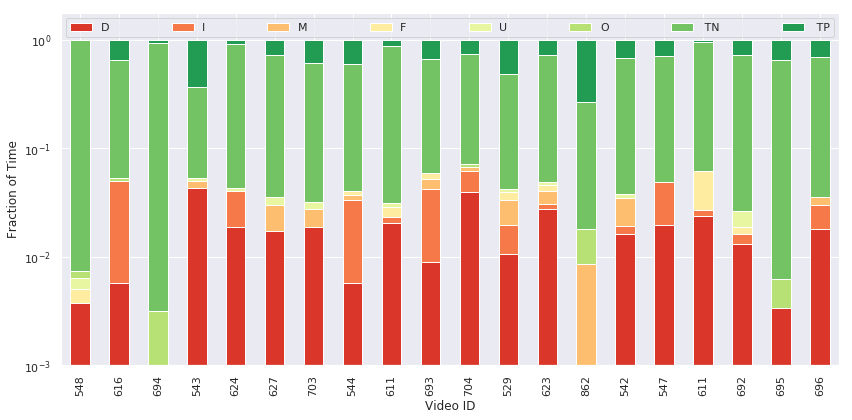

In [19]:
from matplotlib.colors import ListedColormap
sns.set()
ax = perf_df.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("RdYlGn", 8)), 
          figsize=(12,6))
ax.set_xlabel('Video ID')
ax.set_ylabel('Fraction of Time')
plt.yscale('log')
ax.set_ylim((10**-3, 10**0.25))
plt.legend(loc="upper left", mode = "expand", ncol = 8)
plt.tight_layout()
plt.savefig('log_error_graph.png')